#### I to repr the same exact boundary with a shallow and deep network--- failed

#### decided to abandon. too difficult for too little return

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

#%matplotlib notebook
#%matplotlib
%matplotlib inline

from tboard import file2number
from nonlinearities import sigmoid
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from vis_utils import Pub_Model_Dirs, clist,listLineStyle
from calc_bounds import param_counter
#clist=['g','c','m','y','k','b','r']
#listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']

figure_folder='./figures/'

In [4]:
log_dir='./logs/Pub_Model_0504_234557_D2A1'
record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
all_step=np.load(get_path('step','wwatch',log_dir))
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(weights)
time_weights=[[w[-1],b[-1]] for w,b in del_weights]#d*2*wtshape
step=all_step[::dt]
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gridP=np.load(get_path('Prob','hmwatch',log_dir))#not used
GridX=resample_grid(gridX)#200
gX=resample_grid(gridX)#200  #standardized grid
HighResX=resample_grid(gridX,5000)
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

In [ ]:
#d*(wpad,xpad,time,layersize)
PLayers=vec_get_neuron_values(gX,del_weights) #d*(TimexgX1xgX2xnl)

#linestyles=listLineStyle[l]
clist=['g','c','m','y','k','b','r']
listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']
lLS=listLineStyle[:-1]#Save dotted for boundary

#colormap = plt.cm.gist_ncar
#col_cycle=cycler('color', clist)
def draw(time,layer,ax,use_color=True):
    ax.set_prop_cycle(plt.cycler('color', clist))
    
    contour_list=[]
    l=layer
    
    time_PLayers=[A[time] for A in PLayers]
        
#    if len(time_PLayers[l].shape)==2:#only one neuron in layer
#        listL=[time_PLayers[l]]
#    else:
#        listL=splitL(time_PLayers[l])
    listL=splitL(time_PLayers[l])
    
    if layer+1<len(PLayers):
        ls=lLS[layer%len(lLS)]
    else:
        ls=listLineStyle[-1]
    
    nl=len(listL)
    #plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, nl)])
    #colors=[colormap(i) for i in np.linspace(0, 0.9, nl)]
    for i,Pneu in enumerate(listL):
        if use_color:
            ctf=ax.contour(gX0,gX1,Pneu,colors=clist[i%len(clist)],levels=[0.],linestyles=ls)
        else:
            ctf=ax.contour(gX0,gX1,Pneu,levels=[0.],linestyles=ls)
#        ctf=ax.contour(gX0,gX1,Pneu,levels=[0.])
#        ctf=ax.contour(gX0,gX1,Pneu,colors=next(col_cycle),levels=[0.])
        contour_list.append(ctf)
    return contour_list

In [6]:
#w_weights=[tw[0] for tw in time_weights]
#PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)

In [84]:
sd=np.random.randint(0,1000)
np.random.seed(sd)
# W0=np.array([
#     [ 1., -1, -1., 1.],
#     [ 1., 1., -1., -1.],
#     ])
W0=np.array([
    [ 0., 4., -4.],
    [ 5., -3, -3.],
    ])
# B0=np.zeros(W0.shape[-1])
B0=3*np.ones(W0.shape[-1])
# W1=np.array([
#         [ 1., 1,  ],
#         [ 0., 1., ],
#         [ 1., 0., ],
#         [ 1., 1., ],
#         ])

# W1=np.random.randint(0,10,[W0.shape[-1],3])
M=np.array([
        [1.,  -.5  ],
        [-.5,  1.  ],
        [-.5,  -.5 ]])
W1=np.matmul(M,W0)
# B1=np.array([-50.,-50.,-50.,])
B1=np.zeros(W1.shape[-1])
W2=np.ones_like(B1).reshape([-1,1])
B2=np.array([-50.])

demo_wts=[[W0,B0],[W1,B1],[W2,B2]]

print W1

players=vec_get_neuron_values(gX,demo_wts)#Layers*(wpad,xpad,time,layersize)
#Logit=np.squeeze(players[-1])

[[-2.5  5.5 -2.5]
 [ 5.  -5.  -1. ]
 [-2.5 -0.5  3.5]]


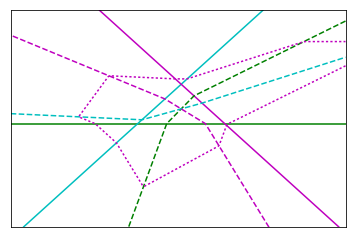

In [86]:
fig,ax=plt.subplots()
gX0,gX1=gX[:,:,0],gX[:,:,1]
levels=np.linspace(0,1,11)#c='b', ###used??
# ctf=ax.contourf(gX[:,:,0],gX[:,:,1],Logit,cmap=plt.cm.bwr_r,vmin=0,vmax=1.01,levels=levels)


for i,out in enumerate(splitL(players[-3])):
    ctf=ax.contour(gX0,gX1,out,levels=[0.],colors=clist[i],linestyles='solid')

for i,out in enumerate(splitL(players[-2])):
    ctf=ax.contour(gX0,gX1,out,levels=[0.],colors=clist[i],linestyles='dashed')
#     ctf=ax.contour(gX0,gX1,out,colors=clist[i])


#listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']
bdry=ax.contour(gX0,gX1,np.squeeze(players[-1]),levels=[0.],colors=clist[i],linestyles='dotted')

# ctf=ax.contour(gX0,gX1,Logit,levels=[0.])

#plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')


NameError: name 'PLayers' is not defined

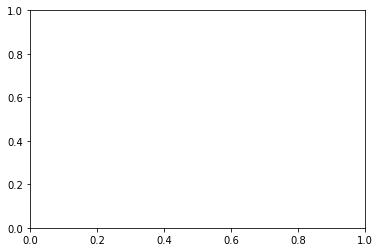

In [81]:
# fig,ax=plt.subplots()
# gX0,gX1=gX[:,:,0],gX[:,:,1]
# CT_lists=[]
# d=len(pLayers)-1
# listL=splitL(players)


# for l in range(d+1):
#     contour_list=draw(0,l,ax)
#     CT_lists.append(contour_list)

In [77]:
ctf.levels

array([-50., -25.,   0.,  25.,  50.,  75., 100.])

In [64]:
slp=splitL(players[-2])
slp[0].shape

(200, 209)

In [67]:
slp0=slp[0]
slp0.min()
slp0.max()

132.899658203125